In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [156]:
plt.style.available
plt.style.use('default')

In [302]:
raw_mobility = pd.read_csv('applemobilitytrends-2020-05-09.csv')

In [303]:
mobility = raw_mobility.melt(['region', 'transportation_type', 'geo_type', 'alternative_name'], value_name = 'value', var_name = 'date')

mobility.index = pd.to_datetime(mobility['date'])
mobility['value'] = mobility['value'].apply(lambda v: v-100)
mobility[mobility['region'] == "Georgia"]['value']

date
2020-01-13     0.00
2020-01-14     4.66
2020-01-15     5.64
2020-01-16    12.08
2020-01-17    30.73
              ...  
2020-05-05    -7.85
2020-05-06    -6.72
2020-05-07    -1.92
2020-05-08     4.33
2020-05-09     9.50
Name: value, Length: 118, dtype: float64

In [338]:
!ls ../covid-tracking-data/data/states_daily_4pm_et.csv
states = pd.read_csv("../covid-tracking-data/data/states_daily_4pm_et.csv", parse_dates = ['date'], index_col = 'date')[::-1]
states

../covid-tracking-data/data/states_daily_4pm_et.csv


,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,NaN,NaN,NaN,NaN,NaN
2020-01-23,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-24,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-25,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-26,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-10,AZ,11119.0,126620.0,NaN,713.0,1528.0,300.0,NaN,195.0,NaN,...,1528.0,137739,137739,137739,4,4.0,14.0,8640.0,159.0,8799.0
2020-05-10,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83,83,83,60,0.0,0.0,0.0,0.0,0.0
2020-05-10,AR,3747.0,61781.0,NaN,64.0,471.0,NaN,NaN,14.0,96.0,...,471.0,65528,65528,65528,5,0.0,0.0,0.0,0.0,0.0


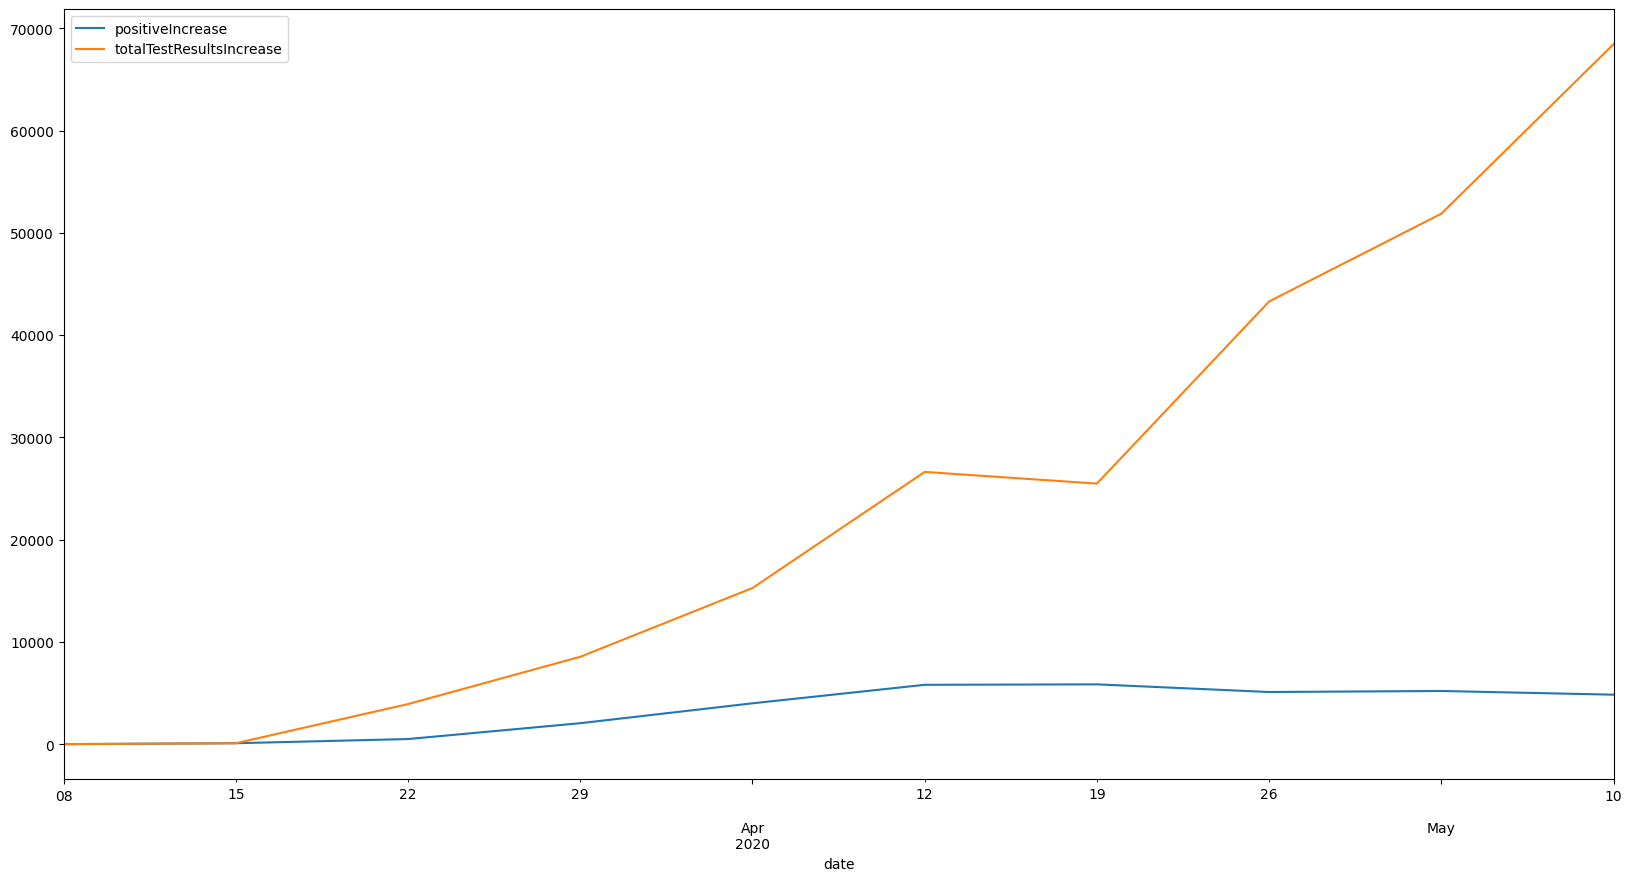

In [352]:
ga_tests = states[states['state'] == 'GA'][['positiveIncrease', 'totalTestResultsIncrease']]
ga_tests.groupby(pd.Grouper(freq='W-SUN')).sum().plot(figsize=(20,10))

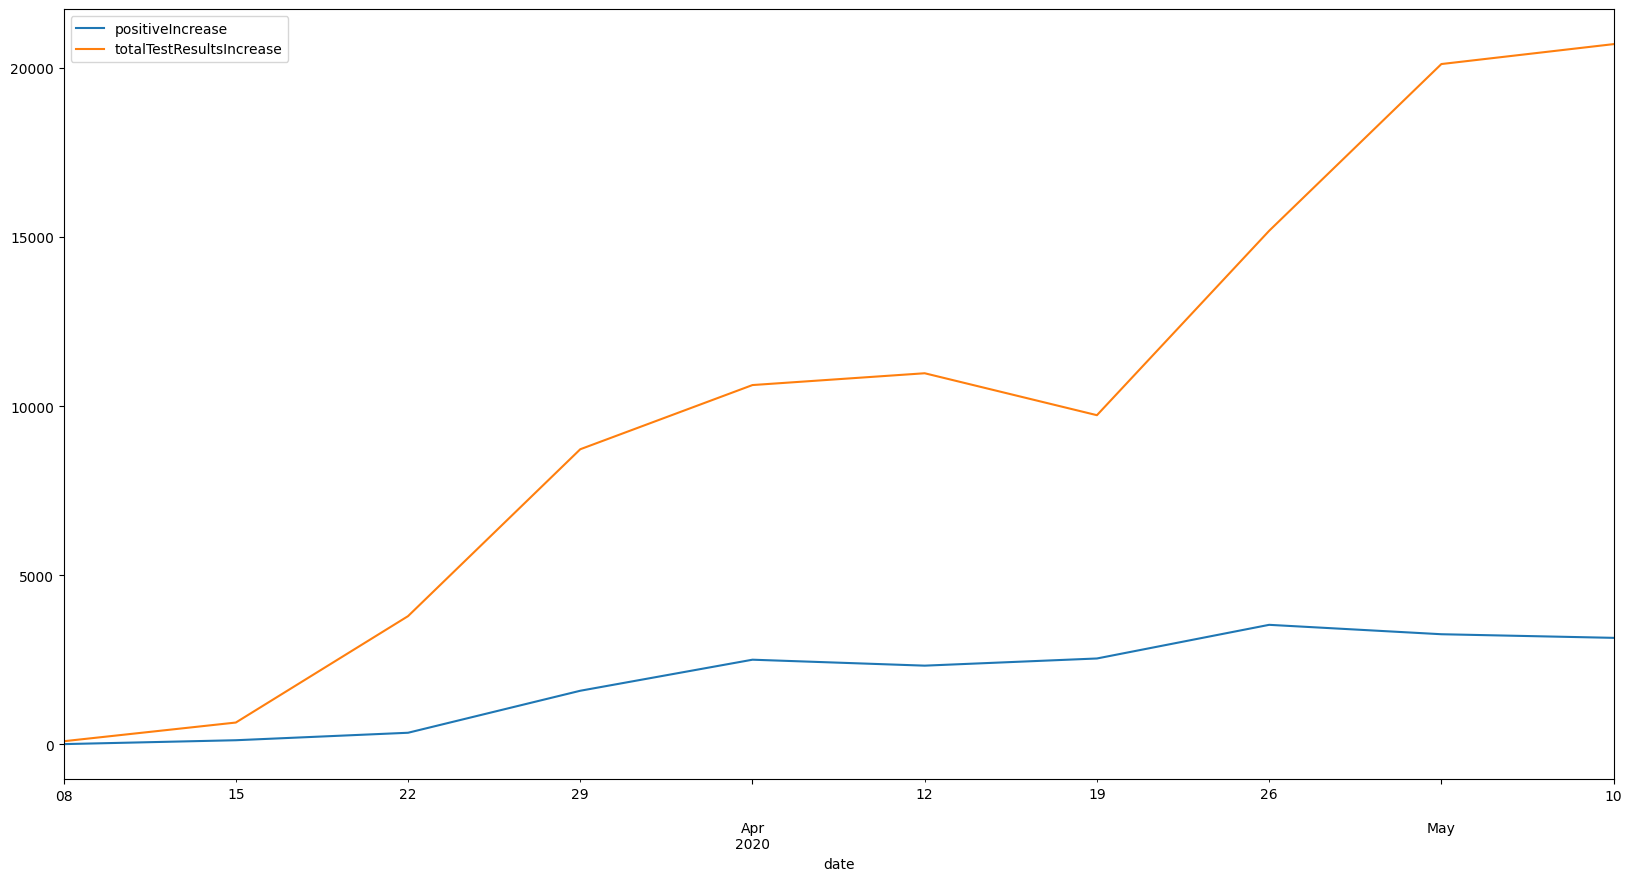

In [346]:
states[states['state'] == 'CO'][['positiveIncrease', 'totalTestResultsIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum().plot(figsize=(20,10))

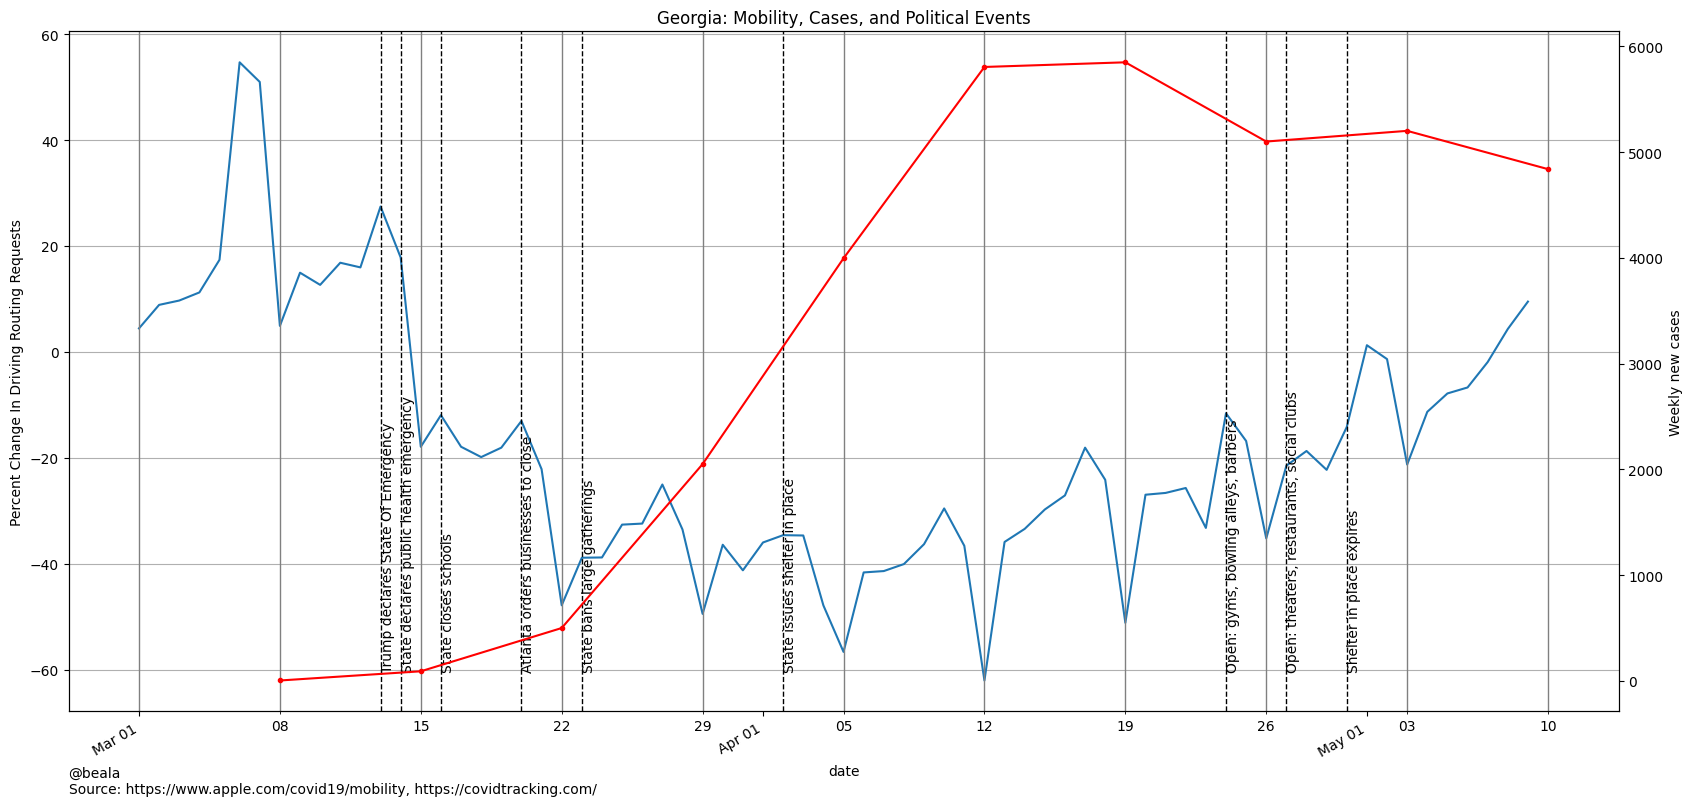

In [368]:
ga = mobility[(mobility['region'] == "Georgia") & (mobility.index >= pd.to_datetime('2020-03-01'))]['value'].copy()
ax = ga.plot(
        x_compat=True,
        figsize = (20,10),
        title = 'Georgia: Mobility, Cases, and Political Events',
        grid=True)
#ax = plt.plot(ga)
ax.set_xlabel("Date")
ax.set_ylabel("Percent Change In Driving Routing Requests")
ax.xaxis.set_major_locator(mdates.DayLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))

ax2 = ga_tests['positiveIncrease'].groupby(pd.Grouper(freq='W-SUN')).sum().plot(
    figsize=(20,10),
    color="red",
    style='.-',
    x_compat=True,
    secondary_y=True)
ax2.set_ylabel("Weekly new cases")

ax.grid(True, which='both', axis='y')
# Draw the darn grid lines myself by matplotlib is a dork
for xmin in mdates.WeekdayLocator(byweekday=mdates.SU).tick_values(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-05-10')):
  ax.axvline(x=xmin, color='grey', linewidth=1)

def event(date, label):
    ax.axvline(x=pd.to_datetime(date), color='black', linestyle='--', linewidth='1')
    ax.text(pd.to_datetime(date) - pd.to_timedelta('0 day'), -60, label, rotation=90, color='black')

event('2020-03-13', 'Trump declares State Of Emergency')
event('2020-03-14', 'State declares public health emergency')
event('2020-03-16', 'State closes schools')
event('2020-03-20', 'Atlanta orders businesses to close')
event('2020-03-23', 'State bans large gatherings')
event('2020-04-02', 'State issues shelter in place')
event('2020-04-24', 'Open: gyms, bowling alleys, barbers')
event('2020-04-27', 'Open: theaters, restaurants, social clubs')
event('2020-04-30', 'Shelter in place expires')

ax.text(
    -0.00,
    -0.12,
    "@beala\nSource: https://www.apple.com/covid19/mobility, https://covidtracking.com/",
    transform=ax.transAxes
)
plt.savefig("ga_mobility.png")
plt.show()

In [326]:
ga_p = ga_positives.groupby(pd.Grouper(freq='W-SUN')).sum()

ga

date
2020-03-01     4.44
2020-03-02     8.88
2020-03-03     9.70
2020-03-04    11.23
2020-03-05    17.40
              ...  
2020-05-05    -7.85
2020-05-06    -6.72
2020-05-07    -1.92
2020-05-08     4.33
2020-05-09     9.50
Name: value, Length: 70, dtype: float64

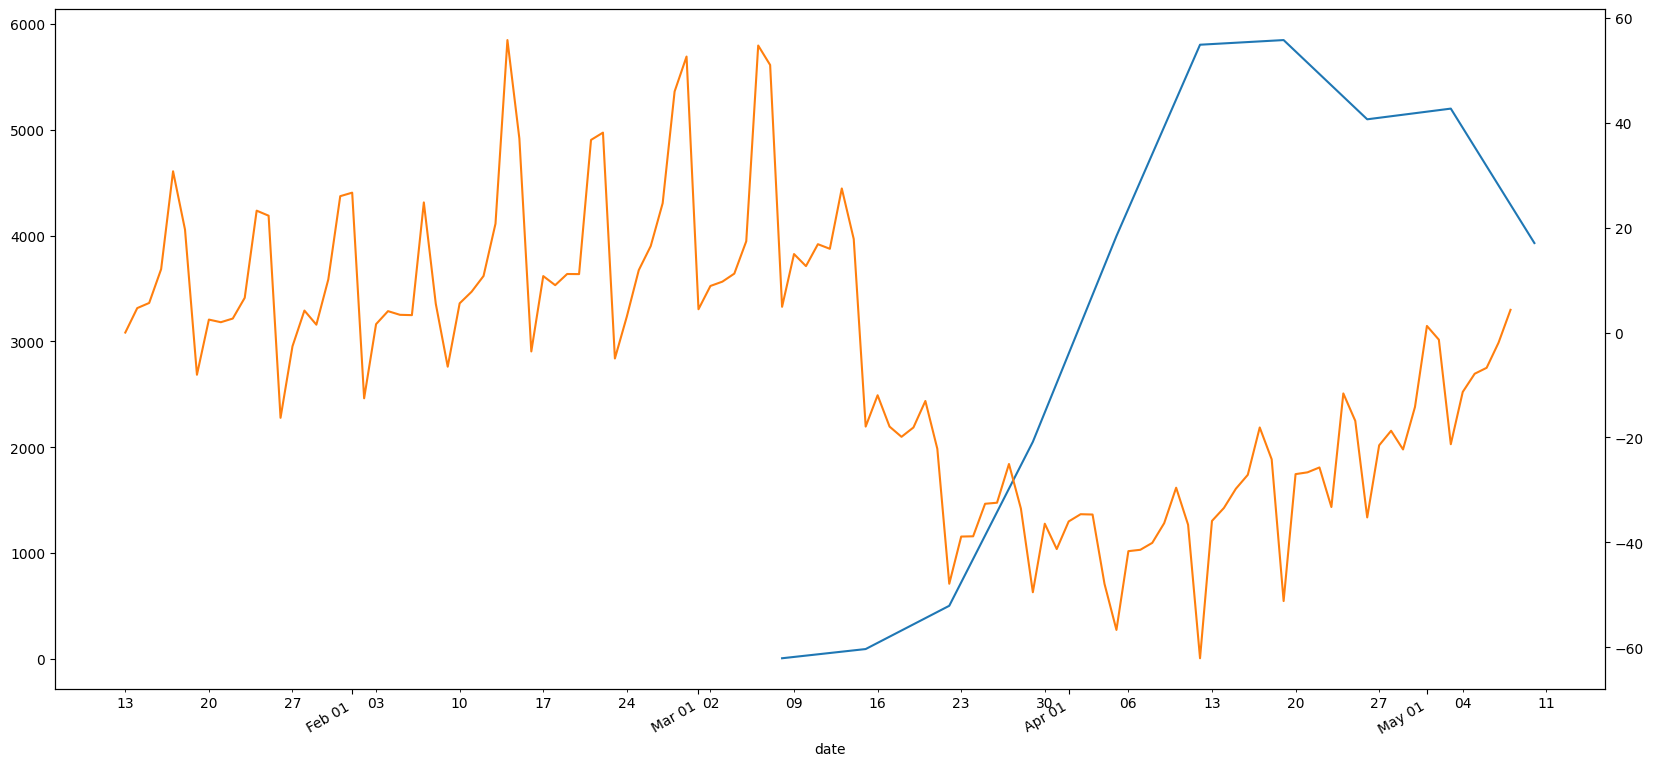

In [279]:
plt.figure()
ax = ga_p.plot(x_compat=True,figsize=(20,10))
for a in [ax]:
    a.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    a.xaxis.set_major_locator(mdates.DayLocator(1))
    a.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    a.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax2 = ga.plot(x_compat=True, secondary_y=True, figsize=(20,10))
    
plt.show()

#plt.grid(which='both')

#ax.xaxis.set_minor_locator(mdates.DayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator(1))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [234]:
!cal 2020
ga_positives.groupby(pd.Grouper(freq='W-MON')).sum()

                            2020
      January               February               March          
Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  
          1  2  3  4                     1   1  2  3  4  5  6  7  
 5  6  7  8  9 10 11   2  3  4  5  6  7  8   8  9 10 11 12 13 14  
12 13 14 15 16 17 18   9 10 11 12 13 14 15  15 16 17 18 19 20 21  
19 20 21 22 23 24 25  16 17 18 19 20 21 22  22 23 24 25 26 27 28  
26 27 28 29 30 31     23 24 25 26 27 28 29  29 30 31              
                                                                  

       April                  May                   June          
Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  
          1  2  3  4                  1  2      1  2  3  4  5  6  
 5  6  7  8  9 10 11   3  4  5  6  7  8  9   7  8  9 10 11 12 13  
12 13 14 15 16 17 18  10 11 12 13 14 15 16  14 15 16 17 18 19 20  
19 20 21 22 23 24 25  17 18 19 20 21 22 23  21 22 23 24 25 26 27  
26 27 28 29 30        24 25 

date
2020-03-09      10.0
2020-03-16     109.0
2020-03-23     651.0
2020-03-30    2037.0
2020-04-06    4505.0
2020-04-13    6001.0
2020-04-20    5632.0
2020-04-27    4966.0
2020-05-04    5455.0
2020-05-11    3164.0
Freq: W-MON, Name: positiveIncrease, dtype: float64

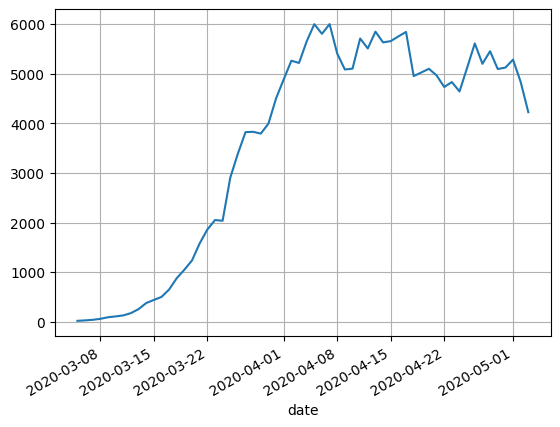

In [218]:
ax = ga_positives.rolling(7).sum().plot()
plt.grid(which='both')

In [217]:
ga_positives

date
2020-05-09    426.0
2020-05-08    667.0
2020-05-07    743.0
2020-05-06    985.0
2020-05-05    343.0
              ...  
2020-03-07      4.0
2020-03-06      0.0
2020-03-05      0.0
2020-03-04      NaN
2020-03-01      0.0
Name: positiveIncrease, Length: 68, dtype: float64

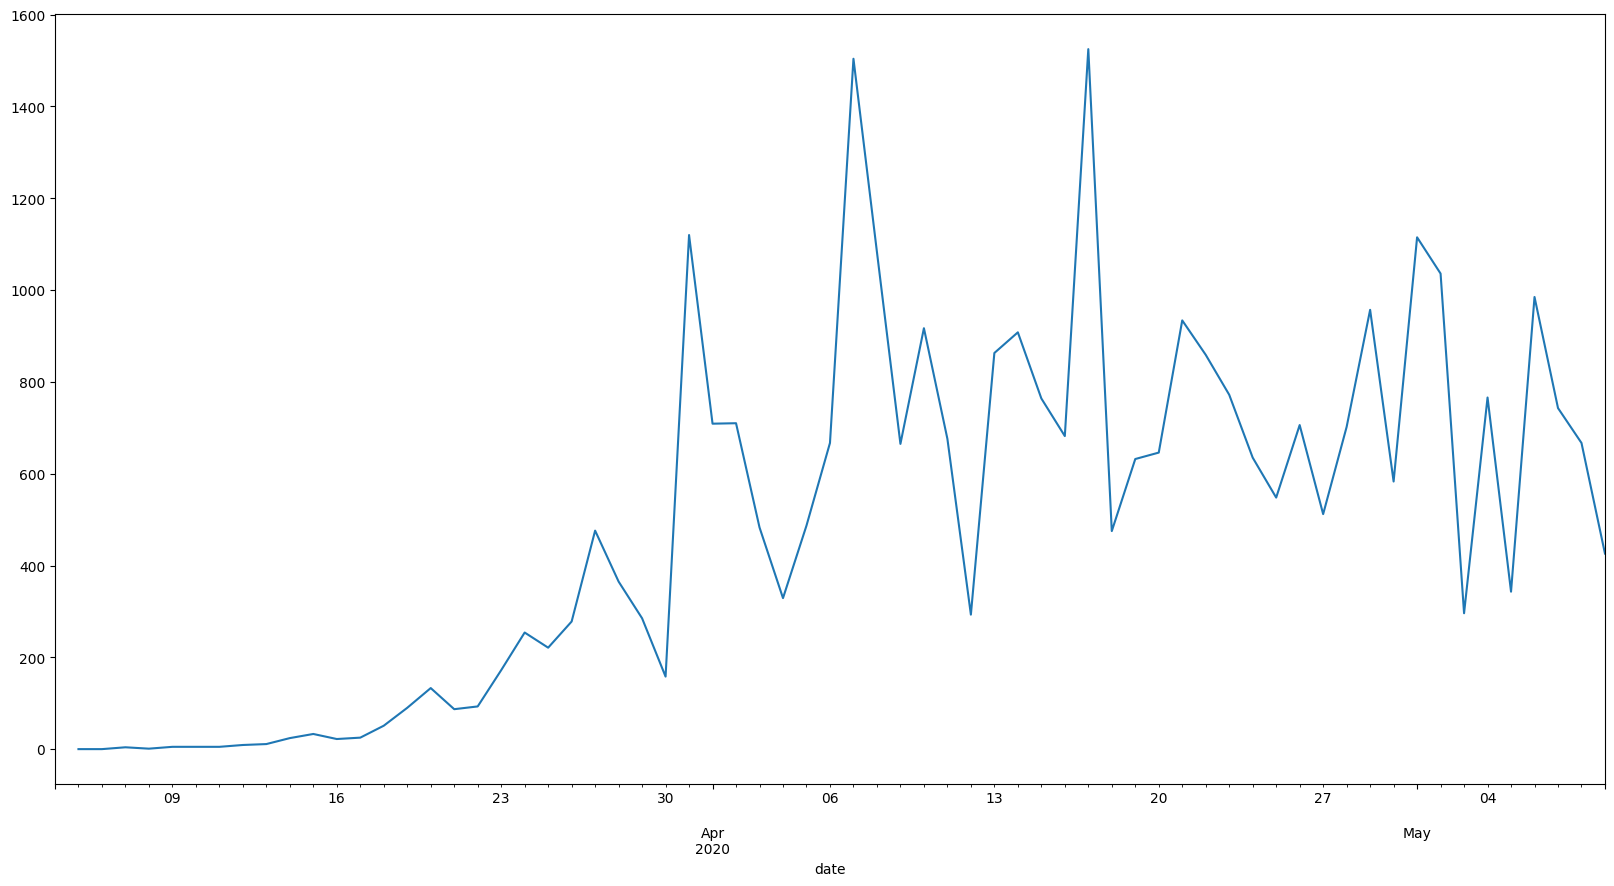

In [177]:
states[states['state'] == 'GA']['positiveIncrease'].plot(
    figsize=(20,10))

In [332]:
!ls ../covid-tracking-data/data
us = pd.read_csv("../covid-tracking-data/data/us_daily.csv", parse_dates = ['date'], index_col = 'date')[::-1]
us

counties.csv	    states_daily_4pm_et.csv  us_current.csv
states_current.csv  states_info.csv	     us_daily.csv


,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-24,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-25,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-06,56,1220557,6566236.0,2742.0,50227.0,131477.0,9380.0,4911.0,4753.0,449.0,...,131477.0,7789535,7786793,7786793,NaN,1949.0,2120.0,217513.0,24952.0,242465.0
2020-05-07,56,1248137,6857376.0,3171.0,49130.0,135176.0,12137.0,5174.0,7070.0,529.0,...,135176.0,8108684,8105513,8105513,NaN,2746.0,3699.0,291140.0,27580.0,318720.0
2020-05-08,56,1275916,7132872.0,3307.0,47718.0,142037.0,11780.0,6294.0,6788.0,531.0,...,142037.0,8412095,8408788,8408788,NaN,1760.0,6861.0,275496.0,27779.0,303275.0


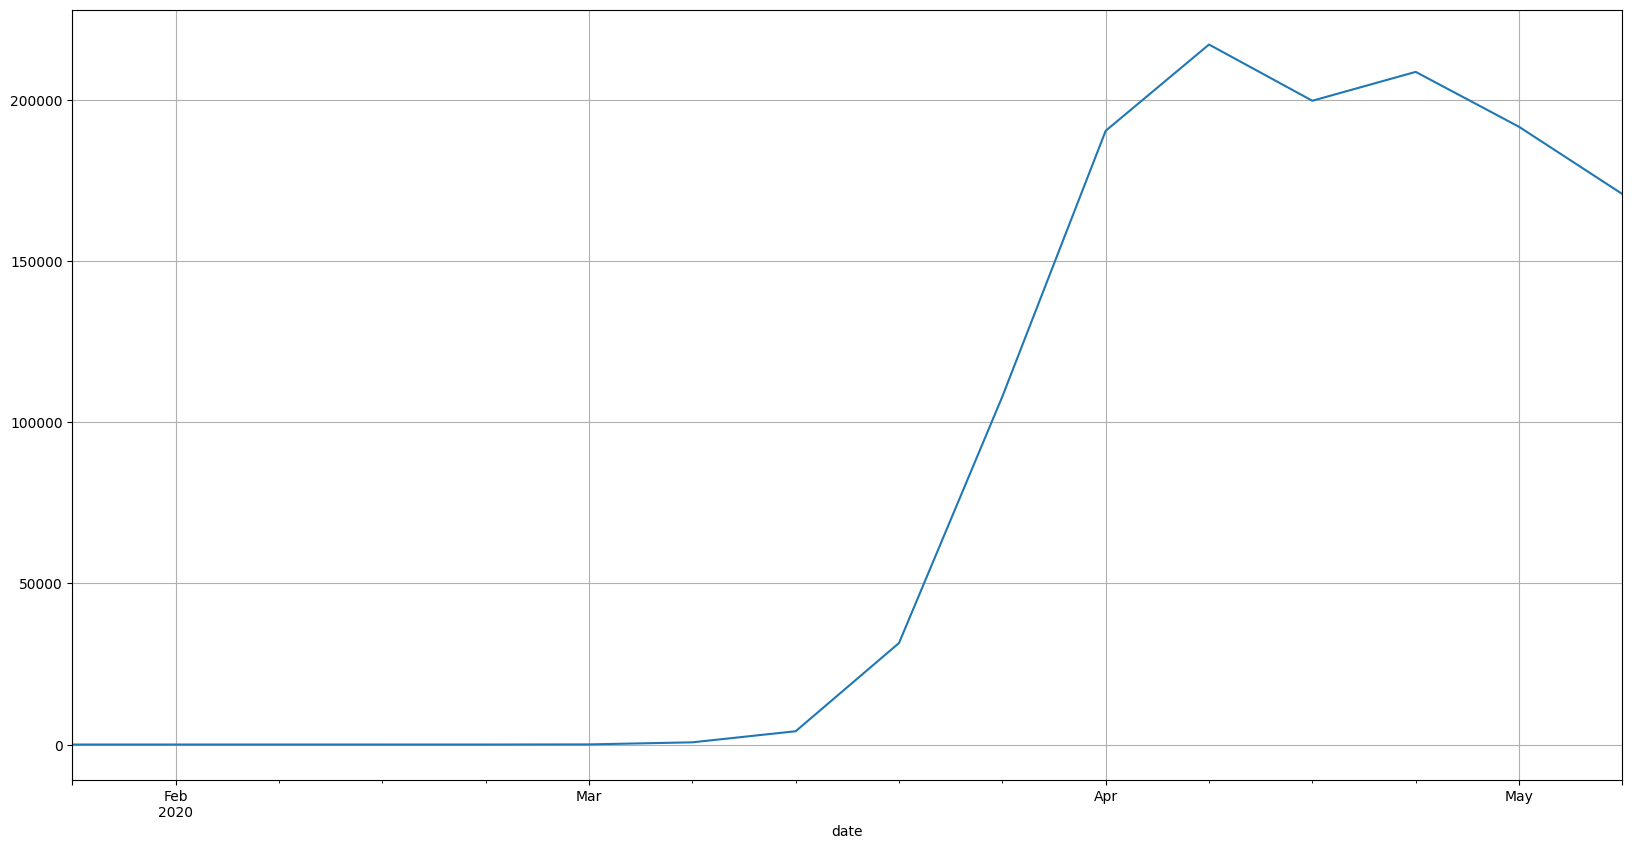

In [337]:
us['positiveIncrease'].groupby(pd.Grouper(freq='W-SUN')).sum().plot(
    grid=True,
    figsize=(20,10))